In [1]:
import time
from IPython.display import clear_output
import numpy    as np
import pandas   as pd
import seaborn  as sns
import matplotlib.pyplot as plt
import sklearn  as skl

from sklearn import pipeline      # Pipeline
from sklearn import preprocessing # OrdinalEncoder, LabelEncoder
from sklearn import impute
from sklearn import compose
from sklearn import model_selection # train_test_split
from sklearn import metrics         # accuracy_score, balanced_accuracy_score, plot_confusion_matrix
from sklearn import set_config
from sklearn.impute import KNNImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA

import sklearn as skl
import time as t
from IPython.display import display, clear_output

import json
import pickle

set_config(display='diagram') # Useful for display the pipeline

print("Pandas  ", pd.__version__)
print("Sklearn ", skl.__version__) # Try to use 0.24

Pandas   1.2.4
Sklearn  0.24.2


In [2]:
ppdf = pd.read_csv("/work/Run_For_Life/dataset_halfSecondWindow.csv", index_col=0)

In [3]:
ppdf.head()

id  time  activityrecognition#0  activityrecognition#1  \
0  156661   3.0                    NaN                   62.0   
1  156662   4.0                    NaN                   62.0   
2  156663   5.0                    NaN                   62.0   
3  156664   6.0                    NaN                   62.0   
4  156665   7.0                    NaN                   62.0   

   android.sensor.accelerometer#mean  android.sensor.accelerometer#min  \
0                          10.053802                          4.328630   
1                          10.687402                          6.373194   
2                          11.816800                          4.817410   
3                           9.401312                          6.124588   
4                          10.389851                          5.313790   

   android.sensor.accelerometer#max  android.sensor.accelerometer#std  \
0                         14.419712                          2.359507   
1                         16.329818                          2.912315   
2                         16.854629                          3.199759   
3                         12.230792                          1.572354   
4                         38.533453                          5.426978   

   android.sensor.game_rotation_vector#mean  \
0                                  0.629076   
1                                  0.577839   
2                                  0.651511   
3                                  0.713226   
4                                  0.707375   

   android.sensor.game_rotation_vector#min  ...  sound#mean  sound#min  \
0                                 0.436463  ...         NaN        NaN   
1                                 0.376494  ...         NaN        NaN   
2                                 0.585485  ...         NaN        NaN   
3                                 0.693072  ...         NaN        NaN   
4                                 0.684707  ...         NaN        NaN   

   sound#max  sound#std  speed#mean  speed#min  speed#max  speed#std  target  \
0        NaN        NaN         NaN        NaN        NaN        NaN     Bus   
1        NaN        NaN         NaN        NaN        NaN        NaN     Bus   
2        NaN        NaN         NaN        NaN        NaN        NaN     Bus   
3        NaN        NaN         NaN        NaN        NaN        NaN     Bus   
4        NaN        NaN         NaN        NaN        NaN        NaN     Bus   

   user  
0   U12  
1   U12  
2   U12  
3   U12  
4   U12  

[5 rows x 70 columns]

### Exploratory Data Analysis

In [4]:
ppdf.columns

Index(['id', 'time', 'activityrecognition#0', 'activityrecognition#1',
       'android.sensor.accelerometer#mean', 'android.sensor.accelerometer#min',
       'android.sensor.accelerometer#max', 'android.sensor.accelerometer#std',
       'android.sensor.game_rotation_vector#mean',
       'android.sensor.game_rotation_vector#min',
       'android.sensor.game_rotation_vector#max',
       'android.sensor.game_rotation_vector#std',
       'android.sensor.gravity#mean', 'android.sensor.gravity#min',
       'android.sensor.gravity#max', 'android.sensor.gravity#std',
       'android.sensor.gyroscope#mean', 'android.sensor.gyroscope#min',
       'android.sensor.gyroscope#max', 'android.sensor.gyroscope#std',
       'android.sensor.gyroscope_uncalibrated#mean',
       'android.sensor.gyroscope_uncalibrated#min',
       'android.sensor.gyroscope_uncalibrated#max',
       'android.sensor.gyroscope_uncalibrated#std',
       'android.sensor.light#mean', 'android.sensor.light#min',
       'android.se

ignore:
light, pressure, magnetic field, gravity,rotation vector, sound, uncalibrated gyroscope and
proximity.

In [5]:
small_df = ppdf.drop(['android.sensor.light#mean', 
       'android.sensor.light#min',
       'android.sensor.light#max', 
       'android.sensor.light#std',
       'android.sensor.pressure#mean', 
       'android.sensor.pressure#min',
       'android.sensor.pressure#max', 
       'android.sensor.pressure#std',
       #'android.sensor.magnetic_field#mean',
       'android.sensor.magnetic_field#min',
       'android.sensor.magnetic_field#max',
       'android.sensor.magnetic_field#std',
       'android.sensor.magnetic_field_uncalibrated#mean',
       'android.sensor.magnetic_field_uncalibrated#min',
       'android.sensor.magnetic_field_uncalibrated#max',
       'android.sensor.magnetic_field_uncalibrated#std',
       'android.sensor.gravity#mean', 
       'android.sensor.gravity#min',
       'android.sensor.gravity#max', 
       'android.sensor.gravity#std',
       'android.sensor.proximity#mean', 
       'android.sensor.proximity#min',
       'android.sensor.proximity#max', 
       'android.sensor.proximity#std',
       #'android.sensor.rotation_vector#mean',
       'android.sensor.rotation_vector#min',
       'android.sensor.rotation_vector#max',
       'android.sensor.rotation_vector#std',
       'sound#mean', 
       'sound#min', 
       'sound#max', 
       'sound#std',
       'android.sensor.gyroscope_uncalibrated#mean',
       'android.sensor.gyroscope_uncalibrated#min',
       'android.sensor.gyroscope_uncalibrated#max',
       'android.sensor.gyroscope_uncalibrated#std',
       'activityrecognition#0',
       'activityrecognition#1',
       'android.sensor.step_counter#std',
       'android.sensor.step_counter#min',
       'android.sensor.step_counter#max',
       'android.sensor.step_counter#mean',
       'speed#std',
       'speed#min',
       'speed#max',
       'speed#mean',
       'android.sensor.linear_acceleration#min',
       'android.sensor.linear_acceleration#std',
       'android.sensor.linear_acceleration#max',
       #'android.sensor.accelerometer#min',
       #'android.sensor.accelerometer#max',
       #'android.sensor.accelerometer#std',
       'android.sensor.game_rotation_vector#max',
       'android.sensor.game_rotation_vector#min',
       'android.sensor.game_rotation_vector#std',
       'android.sensor.orientation#min',
       'android.sensor.orientation#max',
       #'android.sensor.orientation#std',
       'android.sensor.gyroscope#min',
       'android.sensor.gyroscope#max',
       'android.sensor.gyroscope#std',
       #'user',

       'id'],axis=1)

In [6]:
#for n, c in zip(n,c):
#    print(n,c)
print(small_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62585 entries, 0 to 62584
Data columns (total 14 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   time                                      62585 non-null  float64
 1   android.sensor.accelerometer#mean         62585 non-null  float64
 2   android.sensor.accelerometer#min          62585 non-null  float64
 3   android.sensor.accelerometer#max          62585 non-null  float64
 4   android.sensor.accelerometer#std          62583 non-null  float64
 5   android.sensor.game_rotation_vector#mean  54000 non-null  float64
 6   android.sensor.gyroscope#mean             54874 non-null  float64
 7   android.sensor.linear_acceleration#mean   57011 non-null  float64
 8   android.sensor.magnetic_field#mean        57204 non-null  float64
 9   android.sensor.orientation#mean           57169 non-null  float64
 10  android.sensor.orientation#std    

In [7]:
#small_df=small_df.dropna(subset=['speed#mean', 'speed#std','android.sensor.accelerometer#mean','android.sensor.accelerometer#std',
#    'android.sensor.linear_acceleration#mean','android.sensor.linear_acceleration#std'])#,inplace=True)
#small_df=small_df.fillna(0)
#small_df

## EDA

* Plotting
* Handling Null Data
* Deleting Outliers

#### Magnetic Field

** Filling Null Data **

In [8]:
small_df['android.sensor.magnetic_field#mean'].isnull().sum()

5381

In [9]:
small_df['android.sensor.magnetic_field#mean'].fillna(small_df.groupby(['target','user'])['android.sensor.magnetic_field#mean'].transform('mean'), inplace=True)
small_df['android.sensor.magnetic_field#mean'].isnull().sum()

5258

** Deleting Outliers**

In [10]:
len(small_df['android.sensor.magnetic_field#mean'])

62585

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='android.sensor.magnetic_field#mean'>

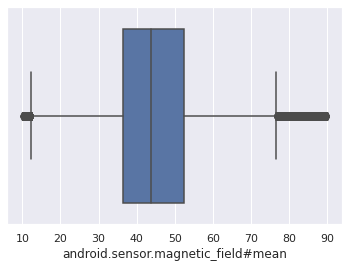

In [11]:
sns.set(font_scale= 1)
plt.figure(figsize=(6, 4))

small_df=small_df.drop(small_df.loc[small_df['android.sensor.magnetic_field#mean']>90].index.tolist())
small_df=small_df.drop(small_df.loc[small_df['android.sensor.magnetic_field#mean']<10].index.tolist())
sns.boxplot(small_df['android.sensor.magnetic_field#mean'])

** Plotting **

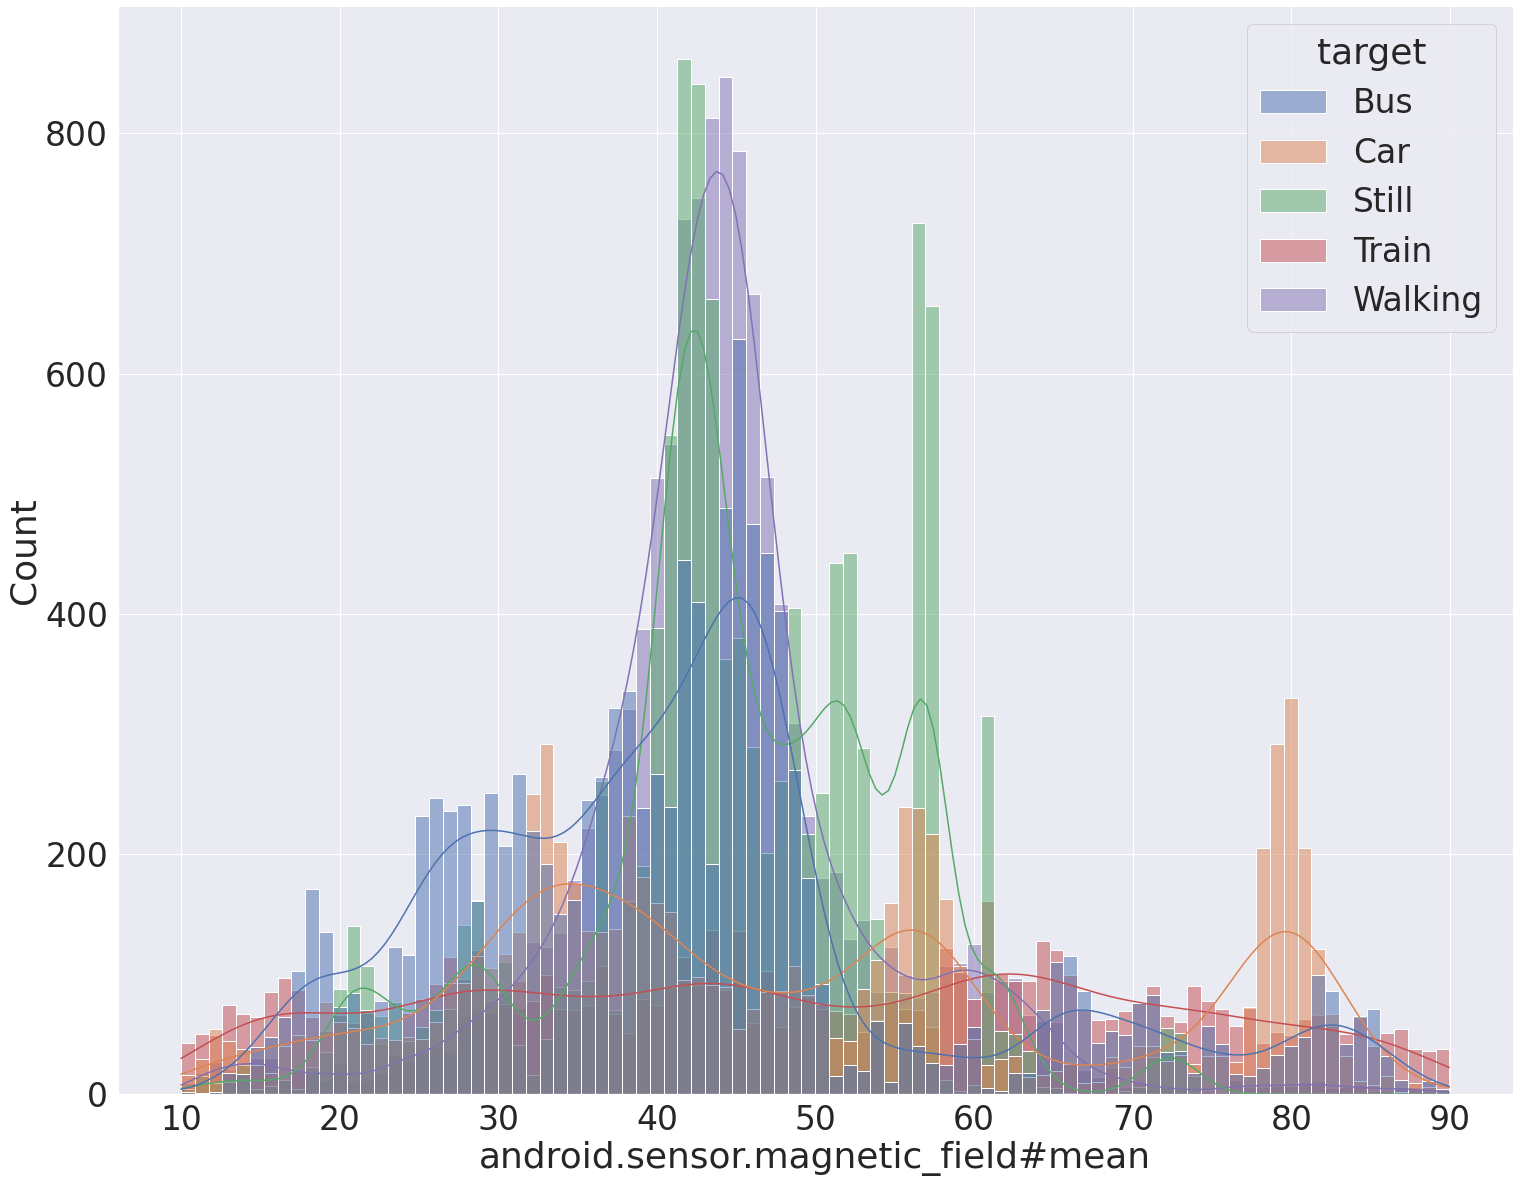

In [12]:
sns.set(font_scale= 3)
plt.figure(figsize=(25, 20))
sns.histplot(x=small_df['android.sensor.magnetic_field#mean'], kde=True,color="r",hue=small_df["target"])
#plt.xlim([0,500])
#plt.ylim([0,150])
sns.despine()

#### Rotation Vector

** Filling Null Data **

In [13]:
small_df['android.sensor.rotation_vector#mean'].isnull().sum()

7813

In [14]:
small_df['android.sensor.rotation_vector#mean'].fillna(small_df.groupby(['target','user'])['android.sensor.rotation_vector#mean'].transform('mean'), inplace=True)
small_df['android.sensor.rotation_vector#mean'].isnull().sum()

7691

** Deleting Outliers**

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='android.sensor.rotation_vector#mean'>

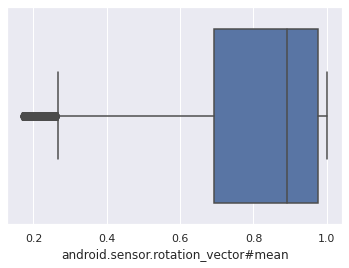

In [15]:
sns.set(font_scale= 1)
plt.figure(figsize=(6, 4))

small_df=small_df.drop(small_df.loc[small_df['android.sensor.rotation_vector#mean']<0.17].index.tolist())
sns.boxplot(small_df['android.sensor.rotation_vector#mean'])

** Plotting **

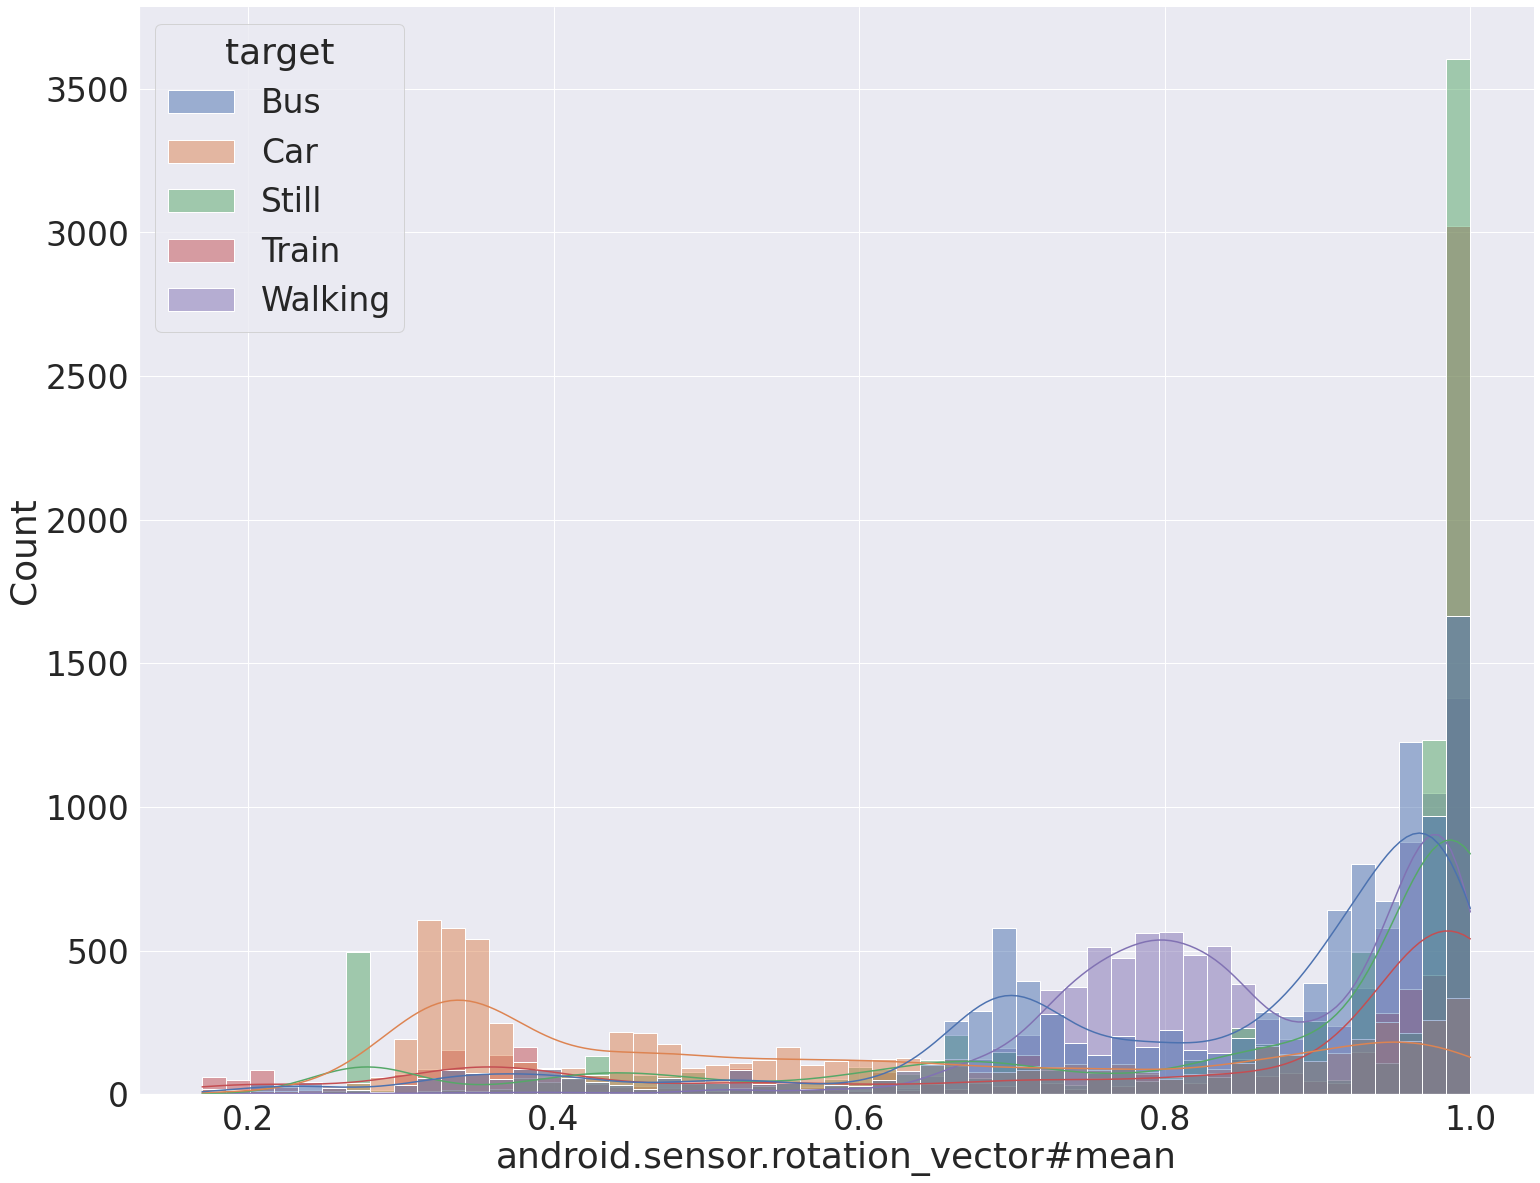

In [16]:
sns.set(font_scale= 3)
plt.figure(figsize=(25, 20))
sns.histplot(x=small_df['android.sensor.rotation_vector#mean'], kde=True,color="r",hue=small_df["target"])
#plt.xlim([0,1])
#plt.ylim([0,1000])
sns.despine()

#### Gyroscope

** Filling Null Data **

In [17]:
small_df['android.sensor.gyroscope#mean'].isnull().sum()

7709

In [18]:
small_df['android.sensor.gyroscope#mean'].fillna(small_df.groupby(['target','user'])['android.sensor.gyroscope#mean'].transform('mean'), inplace=True)
small_df['android.sensor.gyroscope#mean'].isnull().sum()

7691

** Deleting Outliers**

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='android.sensor.gyroscope#mean'>

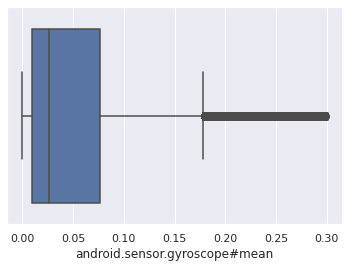

In [19]:
sns.set(font_scale= 1)
plt.figure(figsize=(6, 4))

small_df=small_df.drop(small_df.loc[small_df['android.sensor.gyroscope#mean']>0.3].index.tolist())
sns.boxplot(small_df['android.sensor.gyroscope#mean'])

** Plotting **

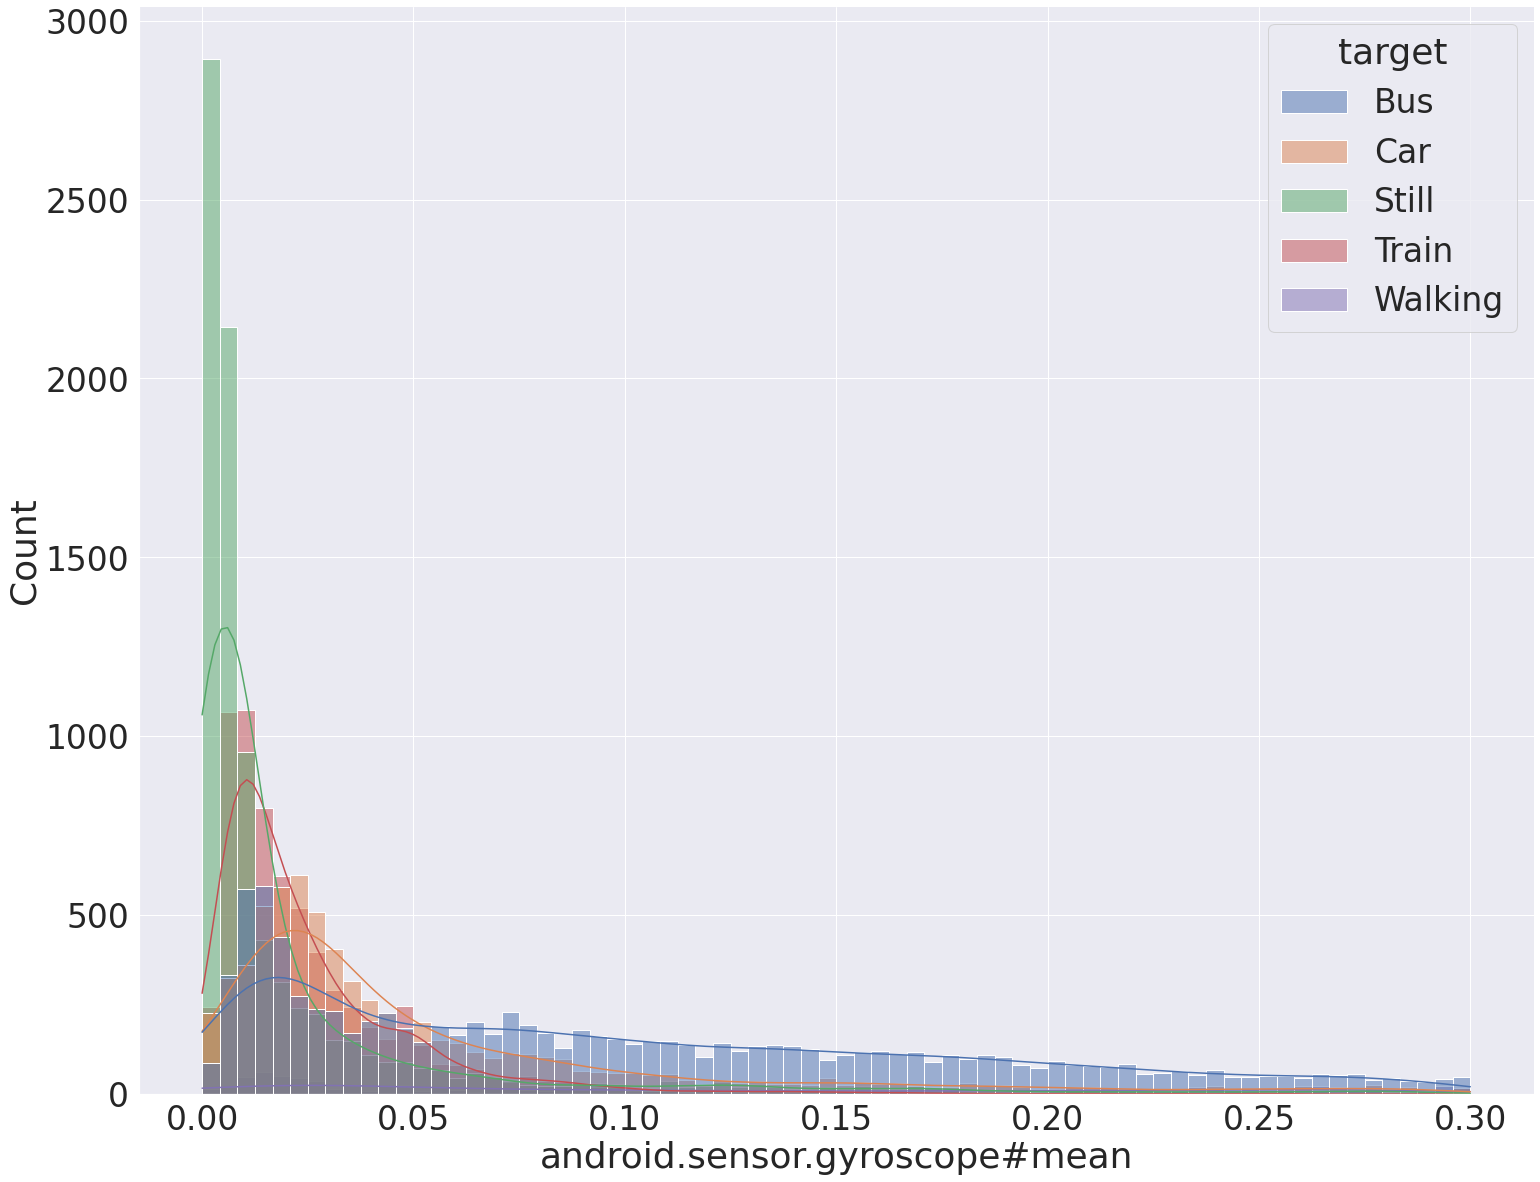

In [20]:
sns.set(font_scale= 3)
plt.figure(figsize=(25, 20))
sns.histplot(x=small_df['android.sensor.gyroscope#mean'], kde=True,color="r",hue=small_df["target"])
#plt.xlim([0,4])
#plt.ylim([0,500])
sns.despine()

#### Linear Acceleration

** Filling Null Data **

In [21]:
small_df['android.sensor.linear_acceleration#mean'].isnull().sum()

5411

In [22]:
small_df['android.sensor.linear_acceleration#mean'].fillna(small_df.groupby(['target','user'])['android.sensor.linear_acceleration#mean'].transform('mean'), inplace=True)
small_df['android.sensor.linear_acceleration#mean'].isnull().sum()

5258

** Deleting Outliers**

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='android.sensor.linear_acceleration#mean'>

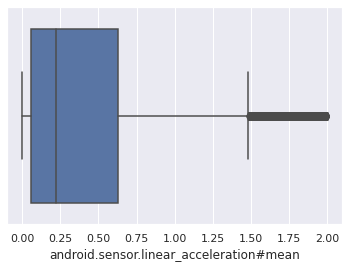

In [23]:
sns.set(font_scale= 1)
plt.figure(figsize=(6, 4))

small_df=small_df.drop(small_df.loc[small_df['android.sensor.linear_acceleration#mean']>2].index.tolist())
sns.boxplot(small_df['android.sensor.linear_acceleration#mean'])

** Plotting **

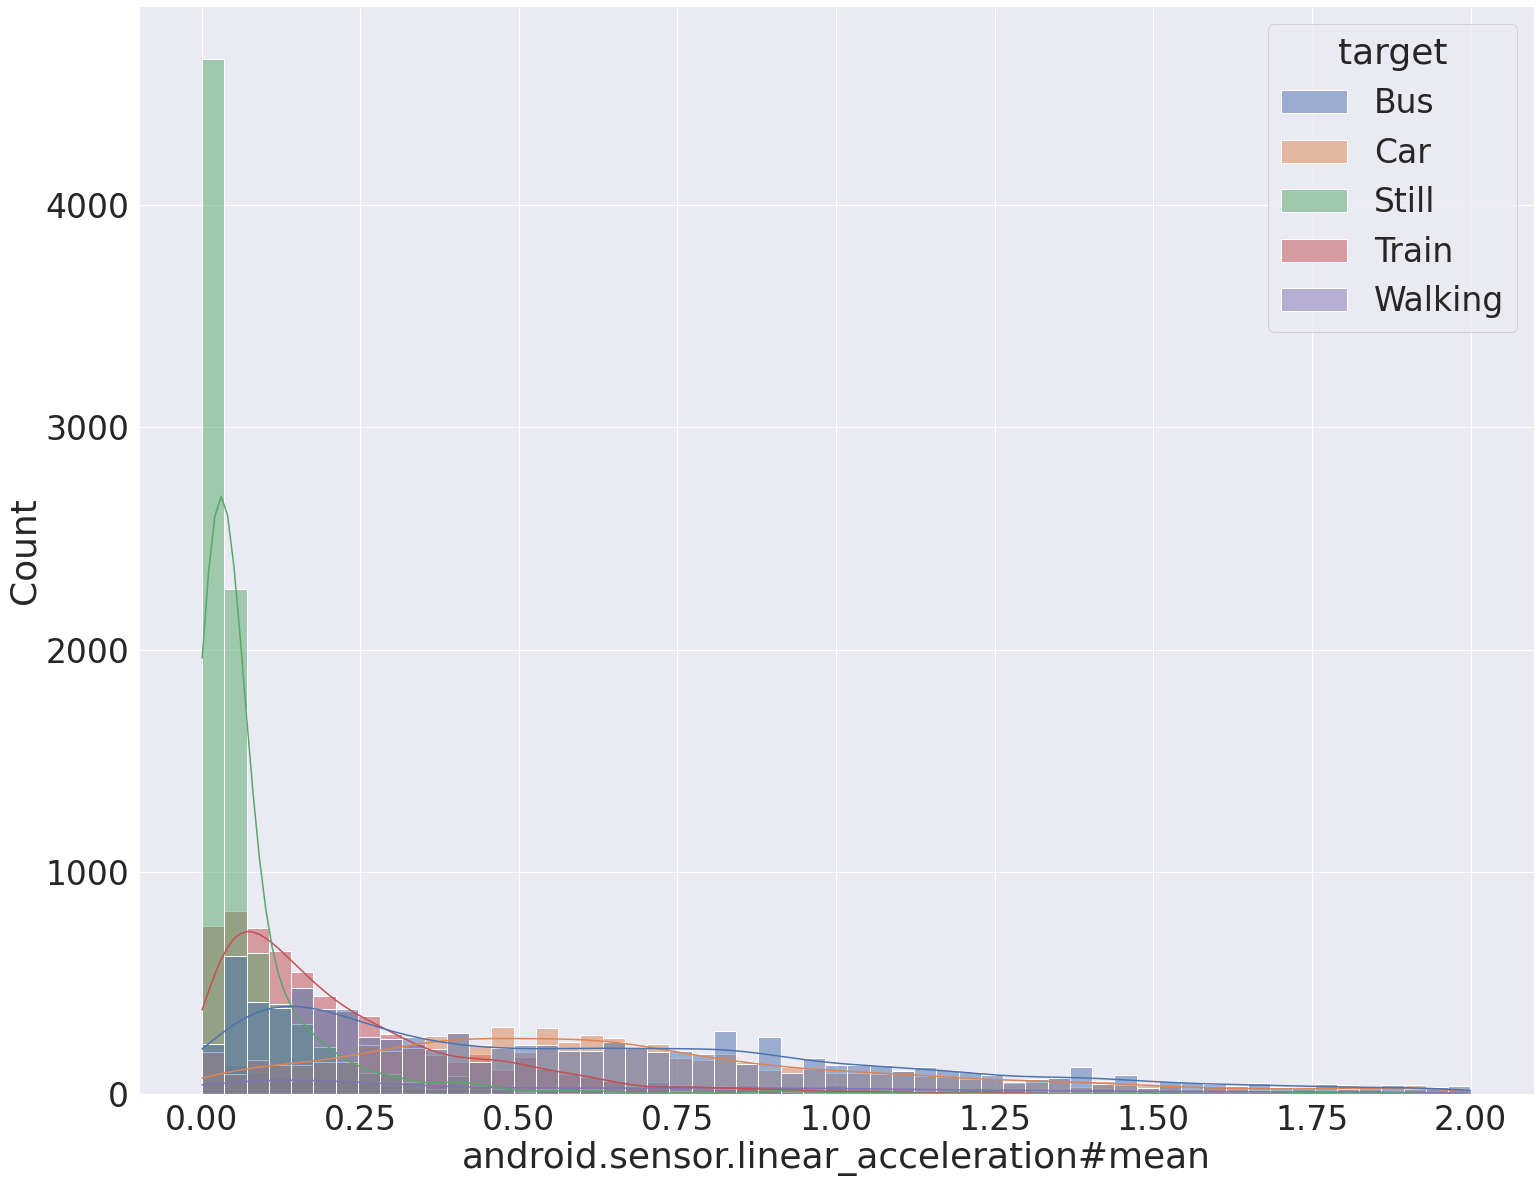

In [24]:
sns.set(font_scale= 3)
plt.figure(figsize=(25, 20))
sns.histplot(x=small_df['android.sensor.linear_acceleration#mean'], kde=True,color="r",hue=small_df["target"])
#plt.xlim([0,15])
#plt.ylim([0,2000])
sns.despine()

#### Accelerometer

In [25]:
small_df['android.sensor.accelerometer#mean'].isnull().sum()

0

** Deleting Outliers**

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='android.sensor.accelerometer#mean'>

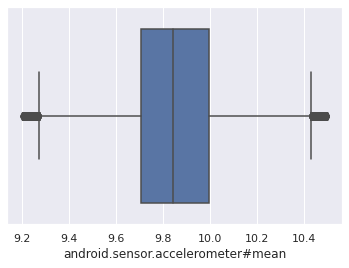

In [26]:
sns.set(font_scale= 1)
plt.figure(figsize=(6, 4))

small_df=small_df.drop(small_df.loc[small_df['android.sensor.accelerometer#mean']>10.5].index.tolist())
small_df=small_df.drop(small_df.loc[small_df['android.sensor.accelerometer#mean']<9.2].index.tolist())
sns.boxplot(small_df['android.sensor.accelerometer#mean'])

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='android.sensor.accelerometer#min'>

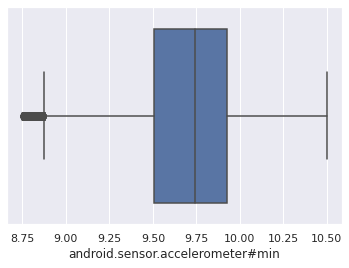

In [27]:
sns.set(font_scale= 1)
plt.figure(figsize=(6, 4))

small_df=small_df.drop(small_df.loc[small_df['android.sensor.accelerometer#min']<8.75].index.tolist())
sns.boxplot(small_df['android.sensor.accelerometer#min'])

In [28]:
len(small_df['android.sensor.accelerometer#max'])

33320

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='android.sensor.accelerometer#max'>

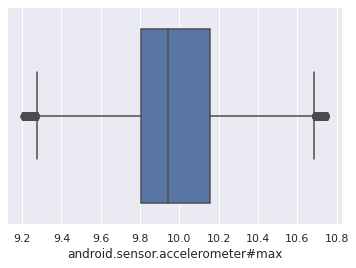

In [29]:
sns.set(font_scale= 1)
plt.figure(figsize=(6, 4))

small_df=small_df.drop(small_df.loc[small_df['android.sensor.accelerometer#max']>10.75].index.tolist())
sns.boxplot(small_df['android.sensor.accelerometer#max'])

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='android.sensor.accelerometer#std'>

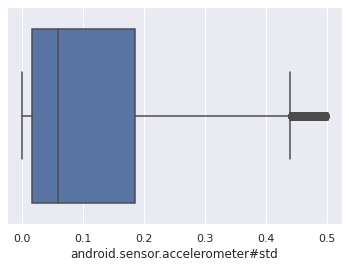

In [30]:
sns.set(font_scale= 1)
plt.figure(figsize=(6, 4))

small_df=small_df.drop(small_df.loc[small_df['android.sensor.accelerometer#std']>0.5].index.tolist())
sns.boxplot(small_df['android.sensor.accelerometer#std'])

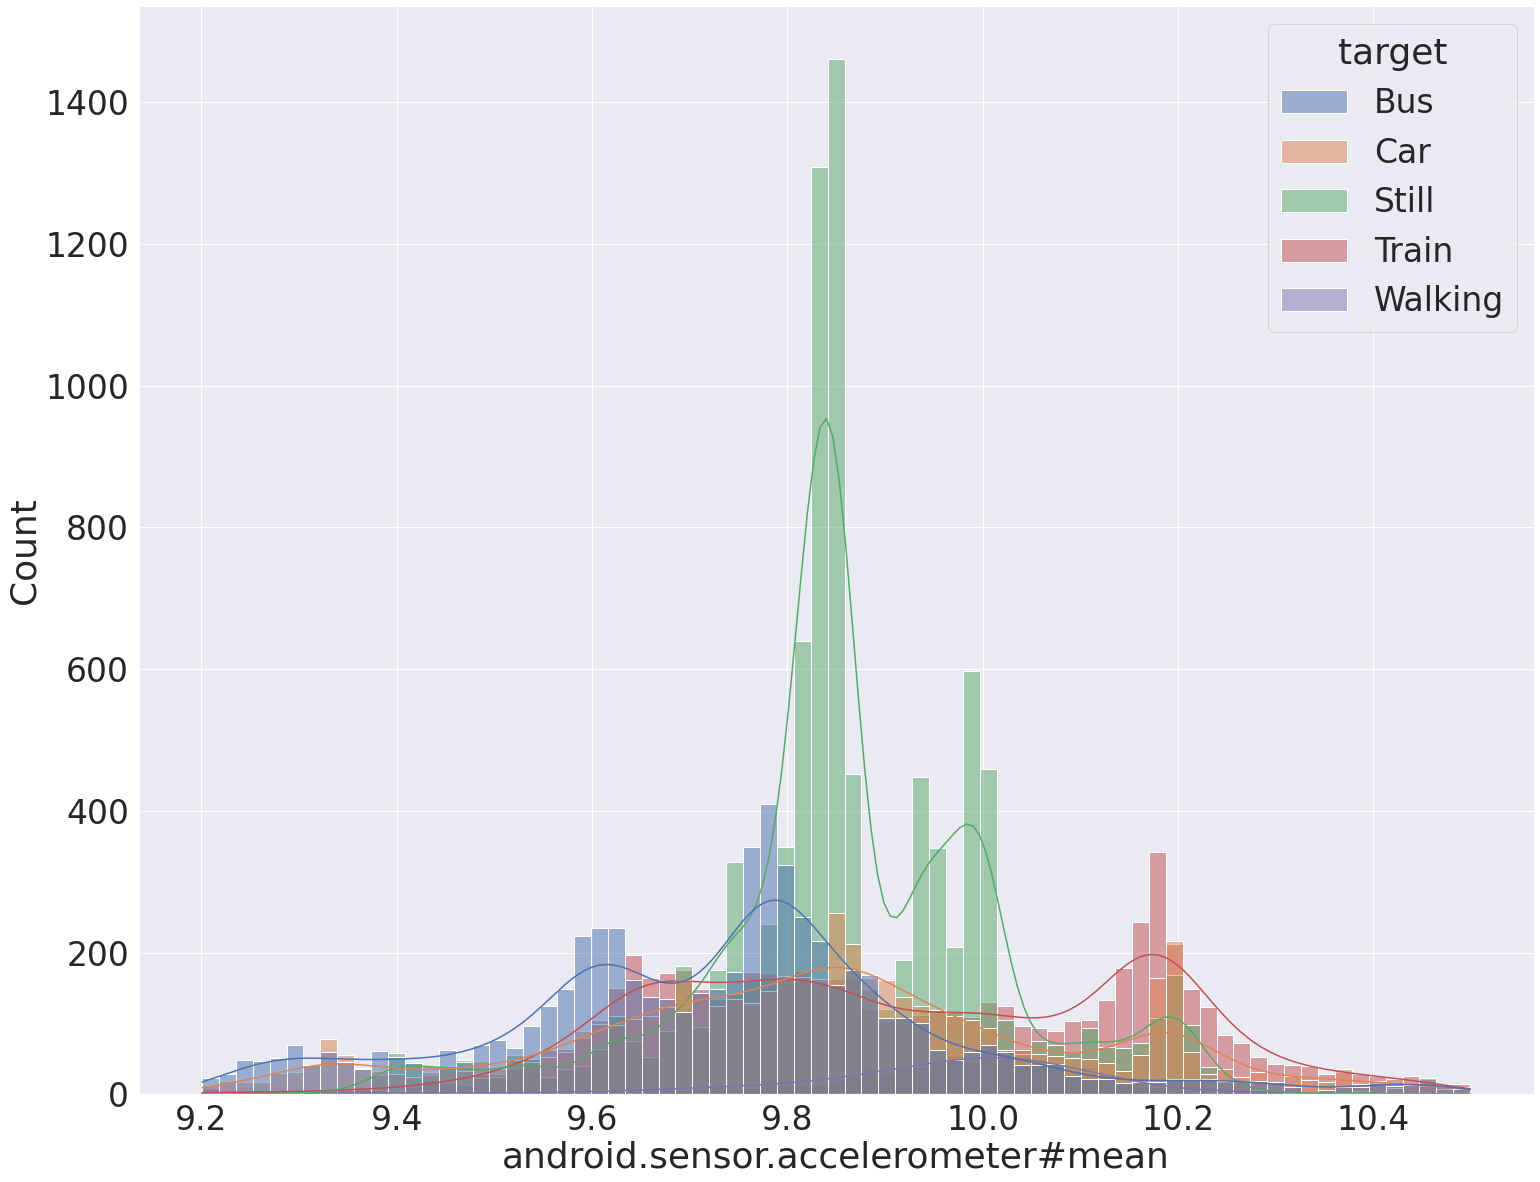

In [31]:
sns.set(font_scale= 3)
plt.figure(figsize=(25, 20))
sns.histplot(x=small_df['android.sensor.accelerometer#mean'], kde=True,color="r",hue=small_df["target"])
#plt.xlim([5,15])
#plt.ylim([0,500])
sns.despine()

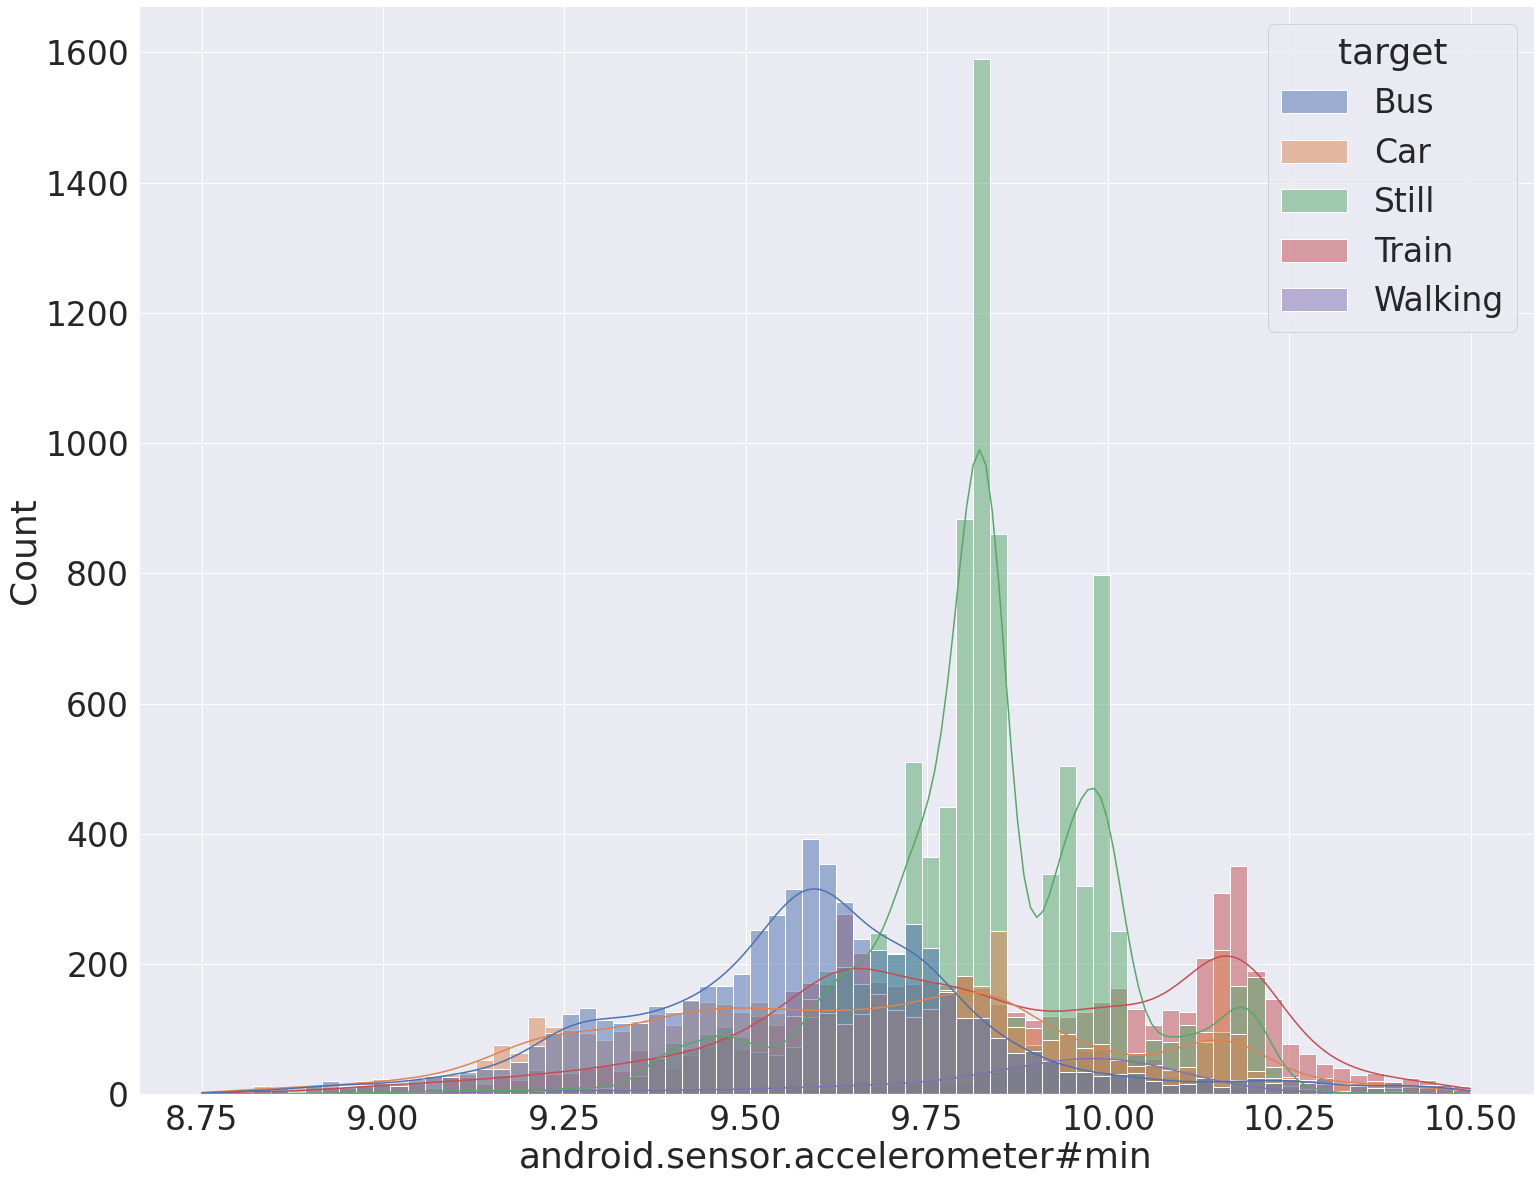

In [32]:
sns.set(font_scale= 3)
plt.figure(figsize=(25, 20))
sns.histplot(x=small_df['android.sensor.accelerometer#min'], kde=True,color="b",hue=small_df["target"])
#plt.xlim([0,20])
#plt.ylim([0,1000])
sns.despine()

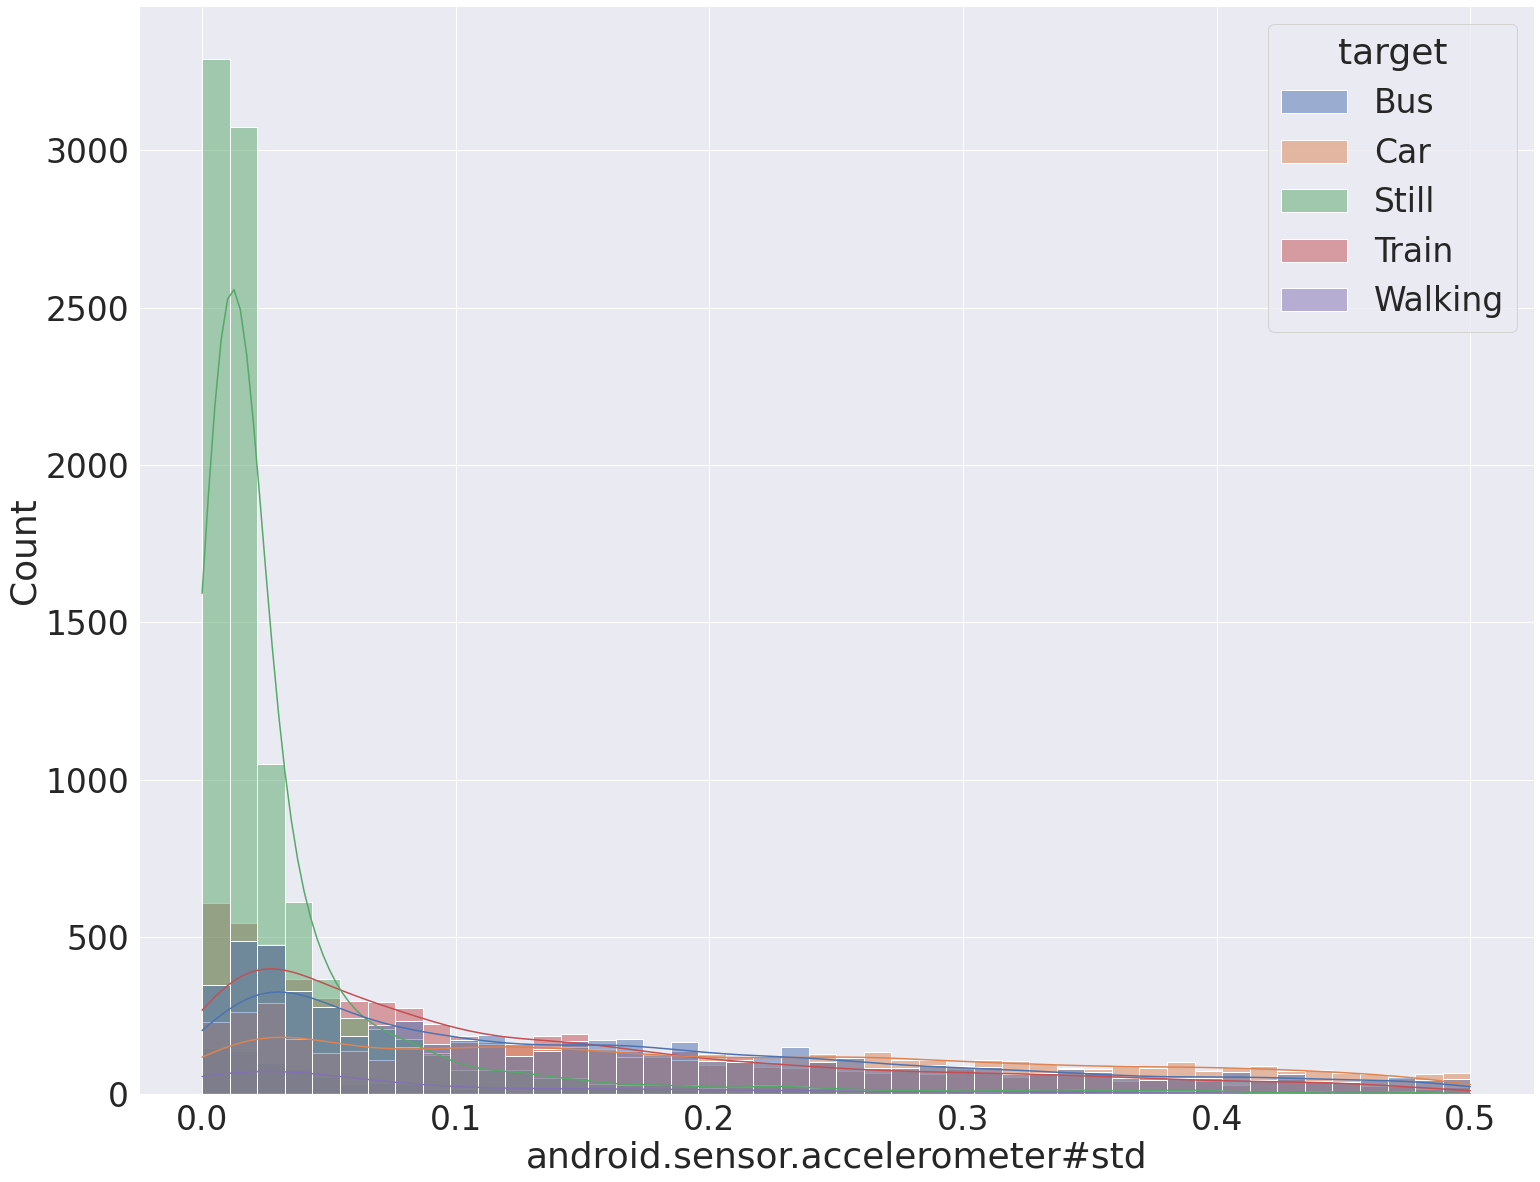

In [33]:
sns.set(font_scale= 3)
plt.figure(figsize=(25, 20))
sns.histplot(x=small_df['android.sensor.accelerometer#std'], kde=True,color="b",hue=small_df["target"])
#plt.xlim([0,5])
#plt.ylim([0,1000])
sns.despine()


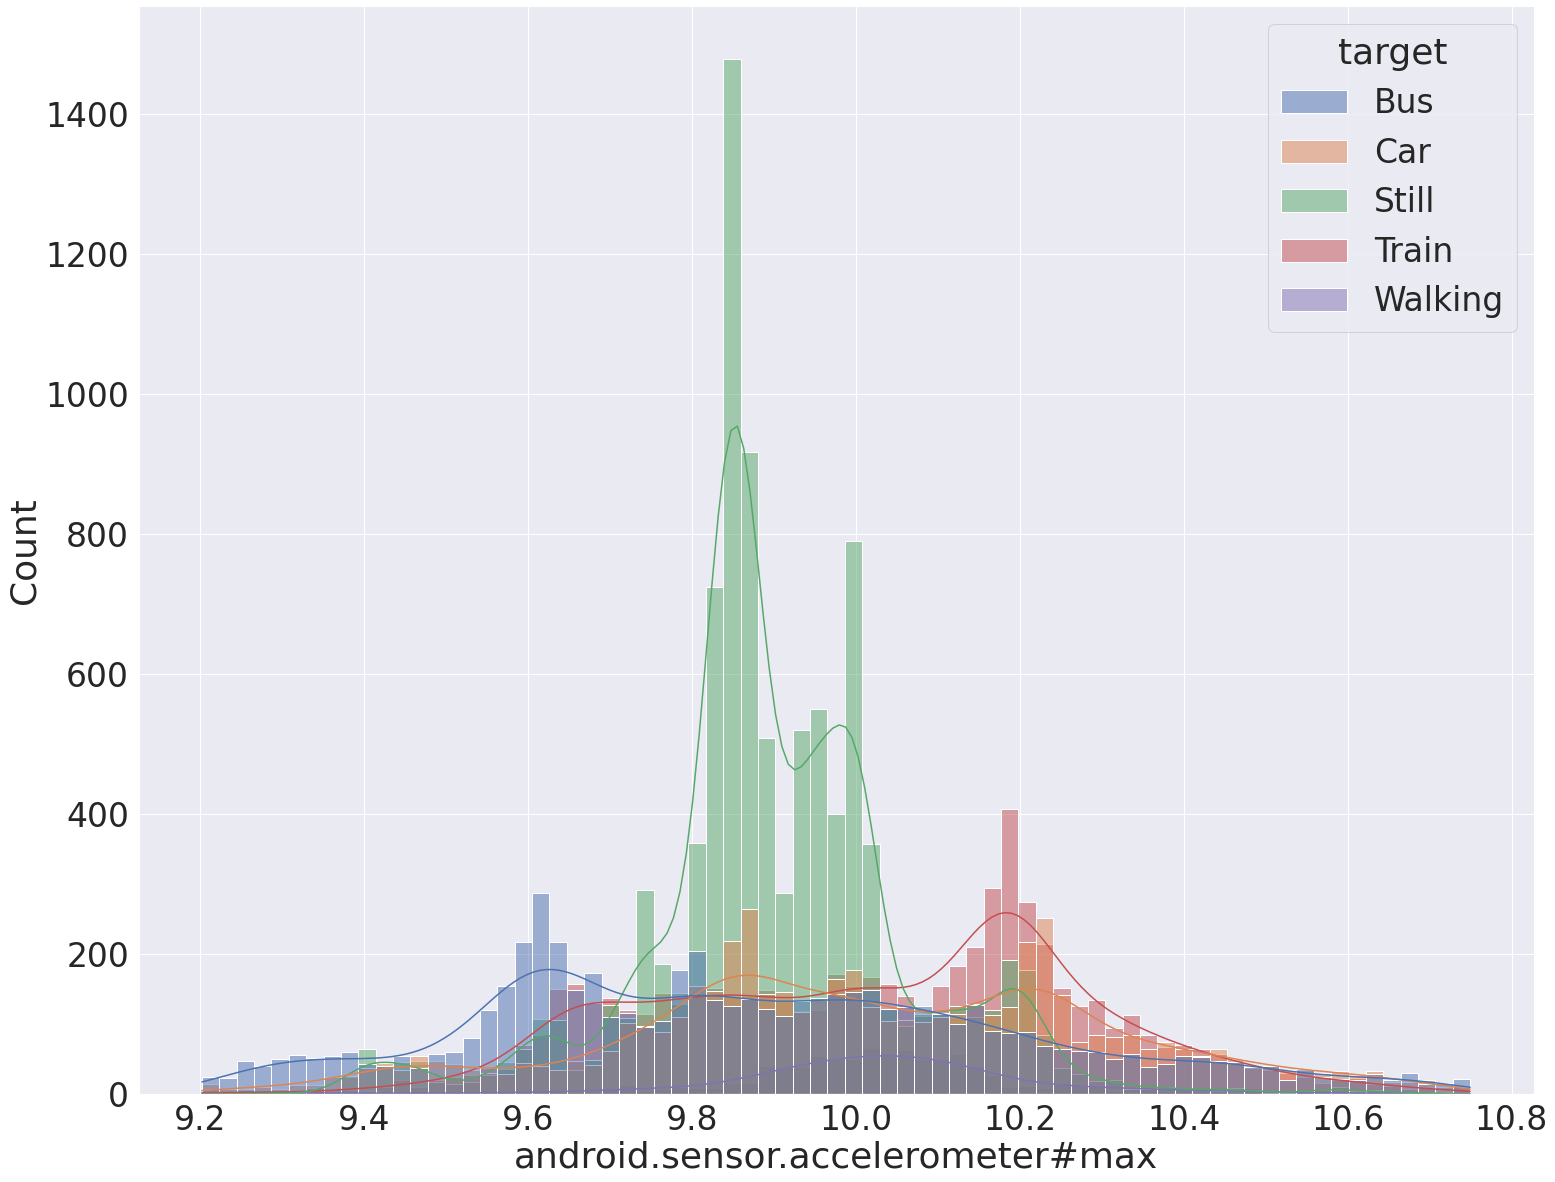

In [34]:
sns.set(font_scale= 3)
plt.figure(figsize=(25, 20))
sns.histplot(x=small_df['android.sensor.accelerometer#max'], kde=True,color="b",hue=small_df["target"])
#plt.xlim([0,20])
#plt.ylim([0,1000])
sns.despine()

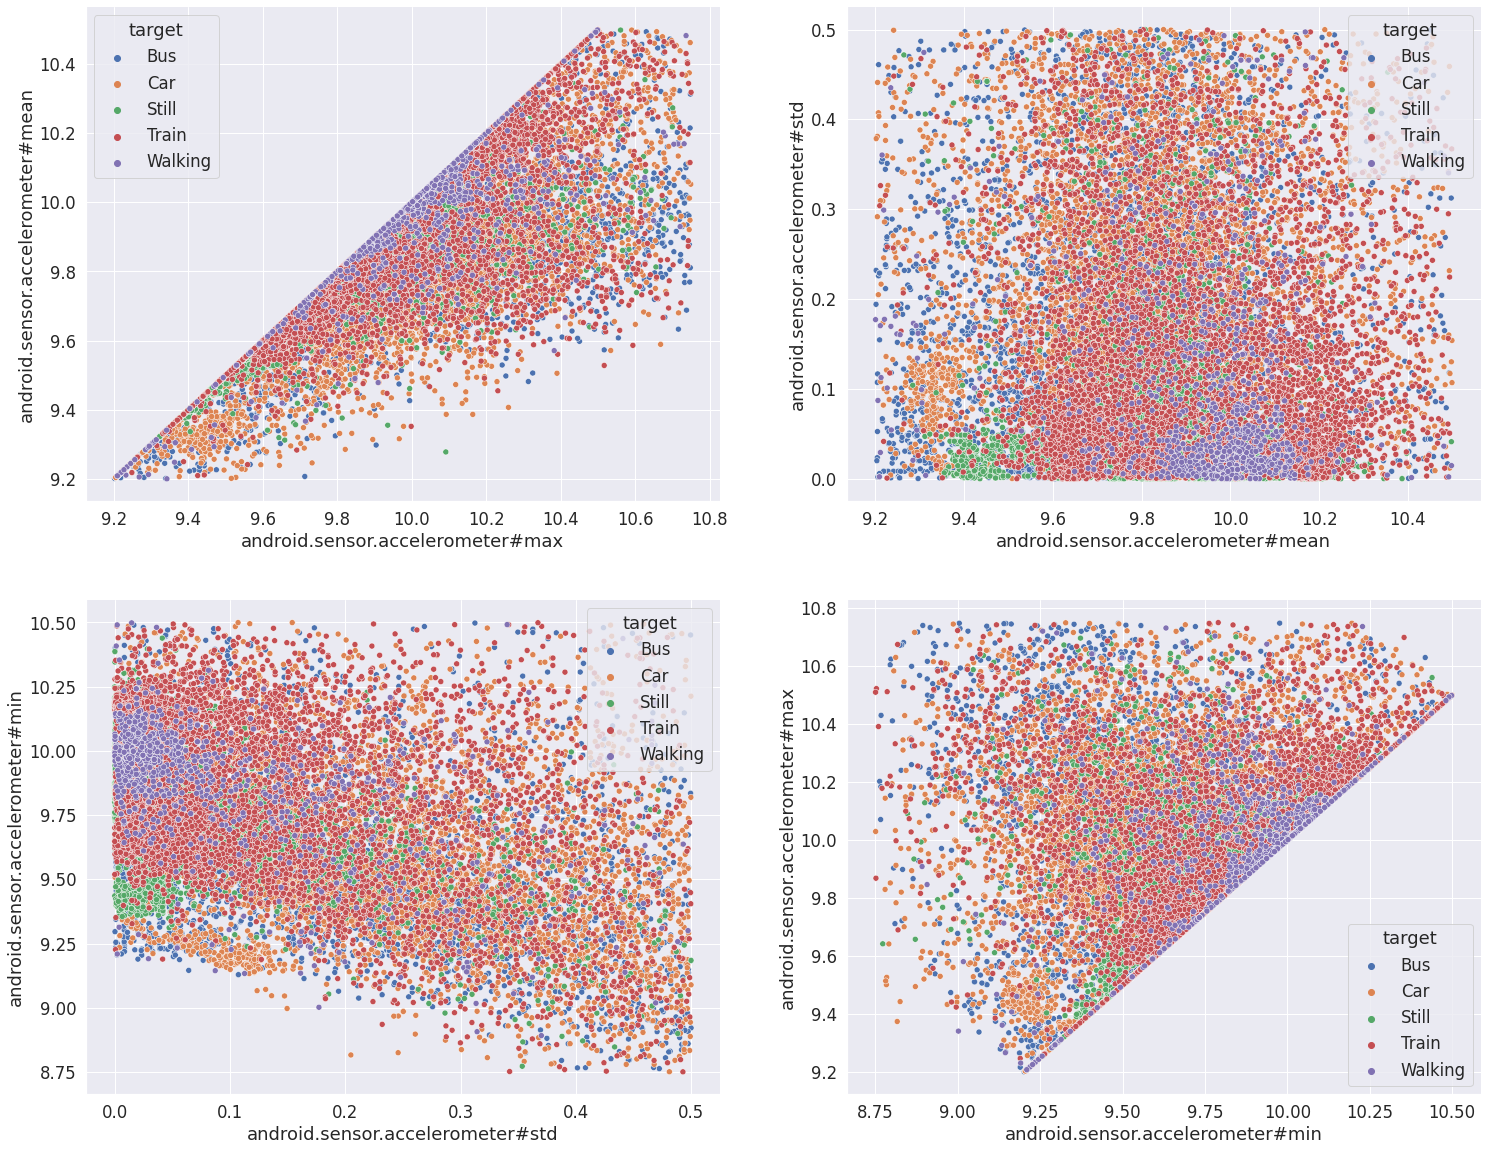

In [35]:
magnetic_field_list=['android.sensor.accelerometer#mean','android.sensor.accelerometer#std',
    'android.sensor.accelerometer#min','android.sensor.accelerometer#max']
plt.figure(figsize=(25, 20))
sns.set(font_scale= 1.5)
for i in range(len(magnetic_field_list)):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x=ppdf[magnetic_field_list[i-1]],y=small_df[magnetic_field_list[i]],color="r",hue=small_df["target"])
    #plt.xlim(x_limite[i])
sns.despine()

#### Game Rotation

** Handling Null Data **

In [36]:
small_df['android.sensor.game_rotation_vector#mean'].isnull().sum()

4541

In [37]:
small_df['android.sensor.game_rotation_vector#mean'].fillna(small_df.groupby(['target','user'])['android.sensor.game_rotation_vector#mean'].transform('mean'), inplace=True)
small_df['android.sensor.game_rotation_vector#mean'].isnull().sum()

4513

** Deleting Outliers **

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='android.sensor.game_rotation_vector#mean'>

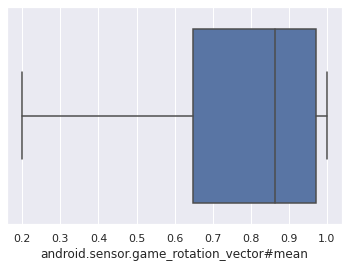

In [38]:
sns.set(font_scale= 1)
plt.figure(figsize=(6, 4))


small_df=small_df.drop(small_df.loc[small_df['android.sensor.game_rotation_vector#mean']<0.2].index.tolist())

sns.boxplot(small_df['android.sensor.game_rotation_vector#mean'])

** Plotting **

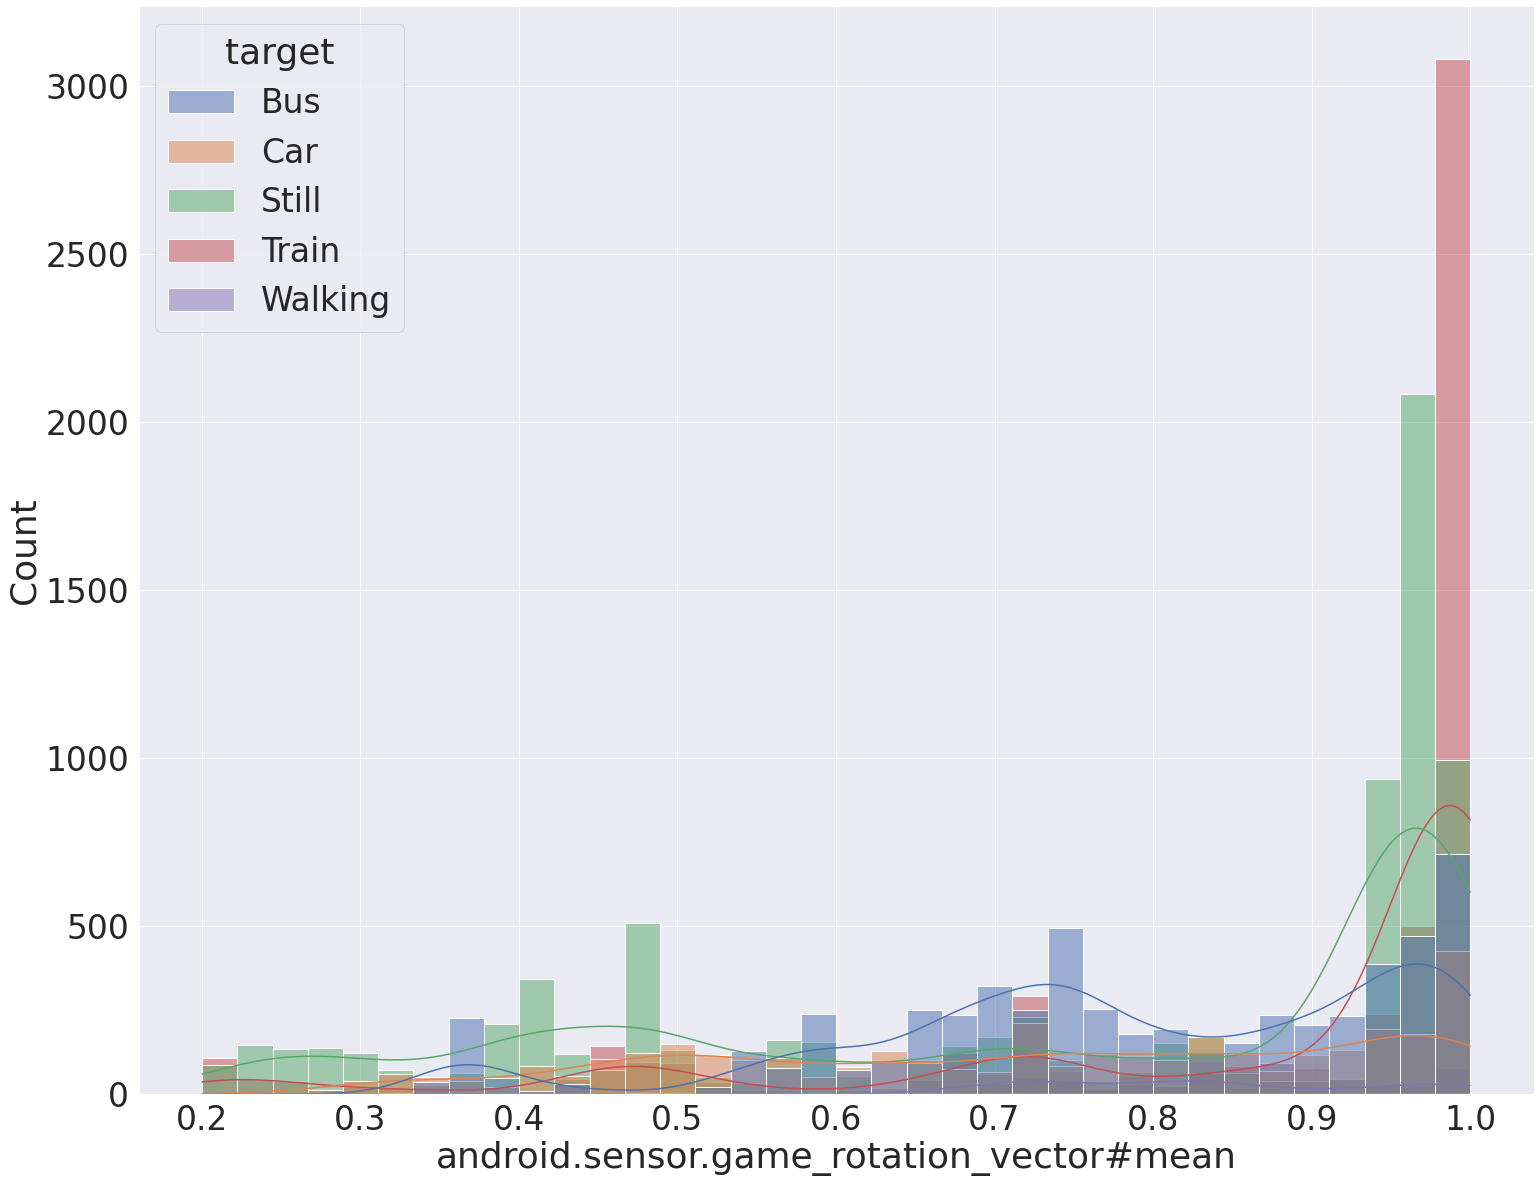

In [39]:
sns.set(font_scale= 3)
plt.figure(figsize=(25, 20))
sns.histplot(x=small_df['android.sensor.game_rotation_vector#mean'], kde=True,color="b",hue=small_df["target"])
#plt.xlim([0,20])
#plt.ylim([0,1000])
sns.despine()

#### Orientation

** Handling Null Data**

In [40]:
small_df['android.sensor.orientation#mean'].isnull().sum()

3463

In [41]:
small_df['android.sensor.orientation#mean'].fillna(small_df.groupby(['target','user'])['android.sensor.orientation#mean'].transform('mean'), inplace=True)
small_df['android.sensor.orientation#mean'].isnull().sum()

3434

In [42]:
small_df['android.sensor.orientation#std'].isnull().sum()

4187

In [43]:
small_df['android.sensor.orientation#std'].fillna(small_df.groupby(['target','user'])['android.sensor.orientation#std'].transform('mean'), inplace=True)
small_df['android.sensor.orientation#std'].isnull().sum()

3563

** Deleting Outliers **

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='android.sensor.orientation#mean'>

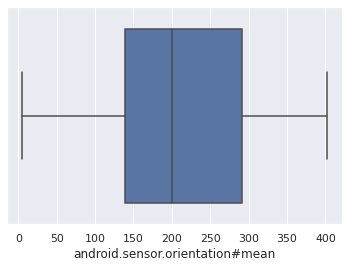

In [44]:
sns.set(font_scale= 1)
plt.figure(figsize=(6, 4))

sns.boxplot(small_df['android.sensor.orientation#mean'])

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='android.sensor.orientation#std'>

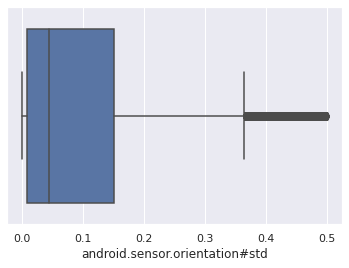

In [45]:
sns.set(font_scale= 1)
plt.figure(figsize=(6, 4))

small_df=small_df.drop(small_df.loc[small_df['android.sensor.orientation#std']>0.5].index.tolist())

sns.boxplot(small_df['android.sensor.orientation#std'])

** Plotting **

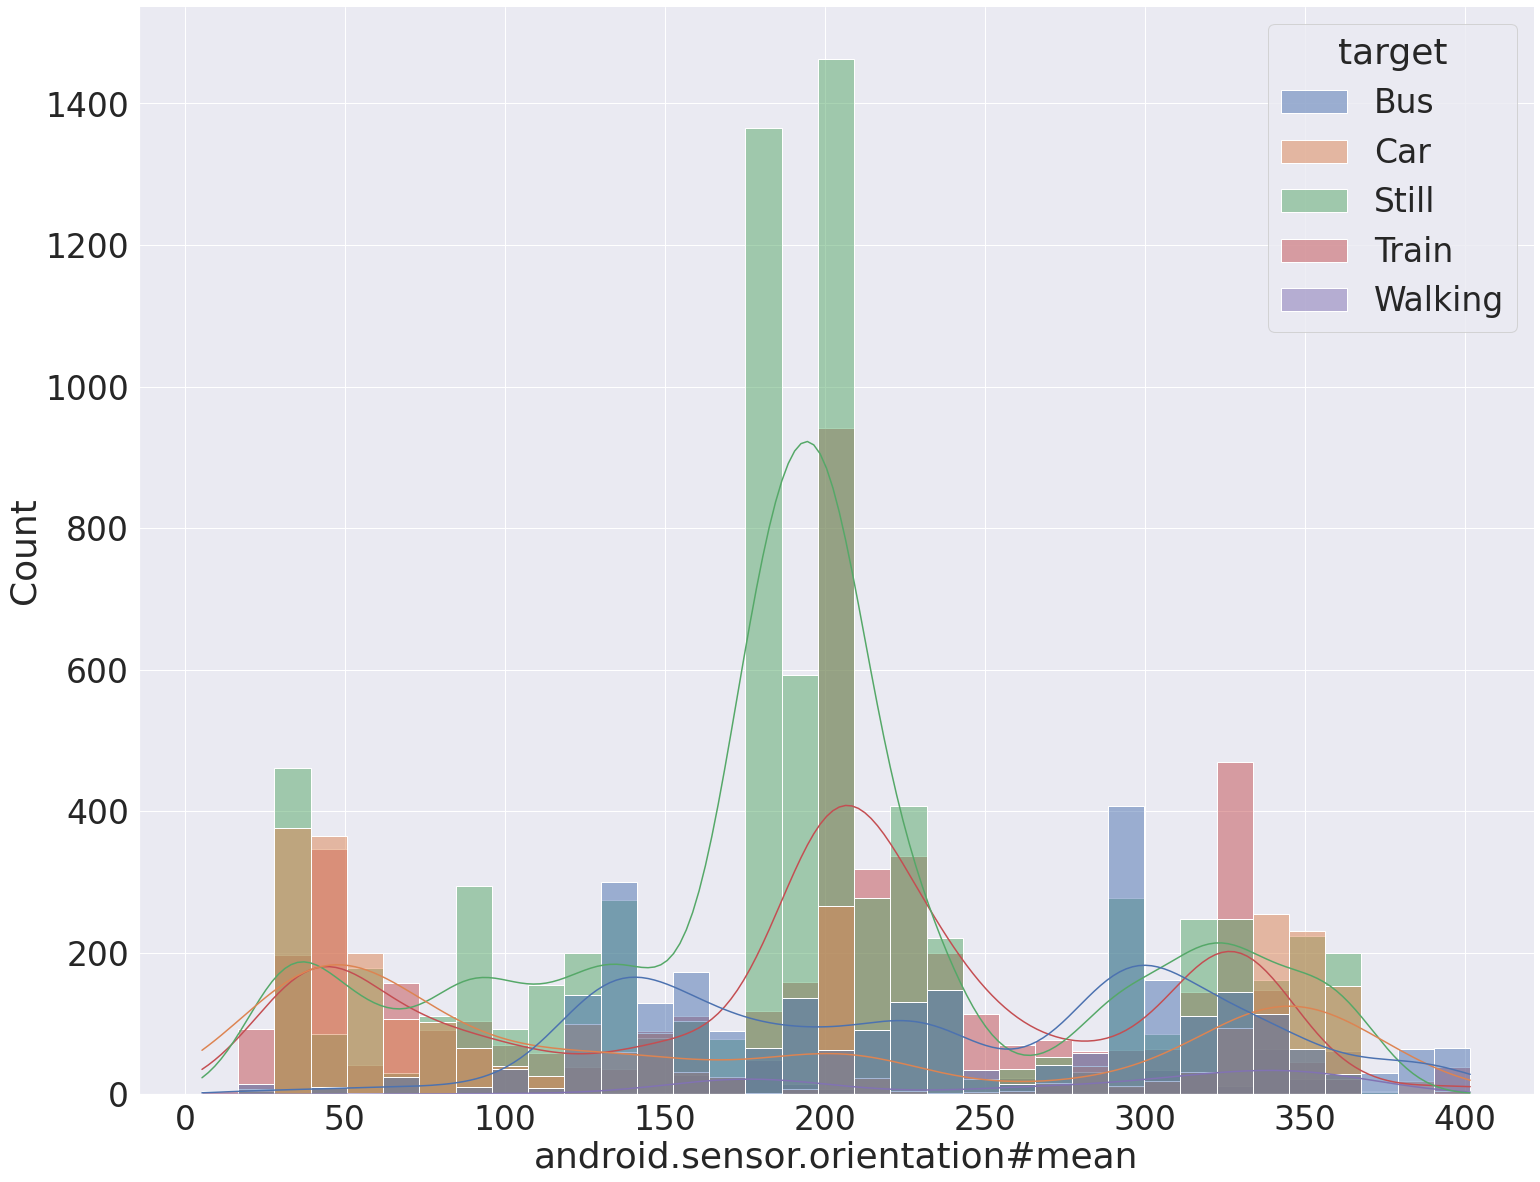

In [46]:
sns.set(font_scale= 3)
plt.figure(figsize=(25, 20))
sns.histplot(x=small_df['android.sensor.orientation#mean'], kde=True,color="b",hue=small_df["target"])
#plt.xlim([0,20])
#plt.ylim([0,1000])
sns.despine()

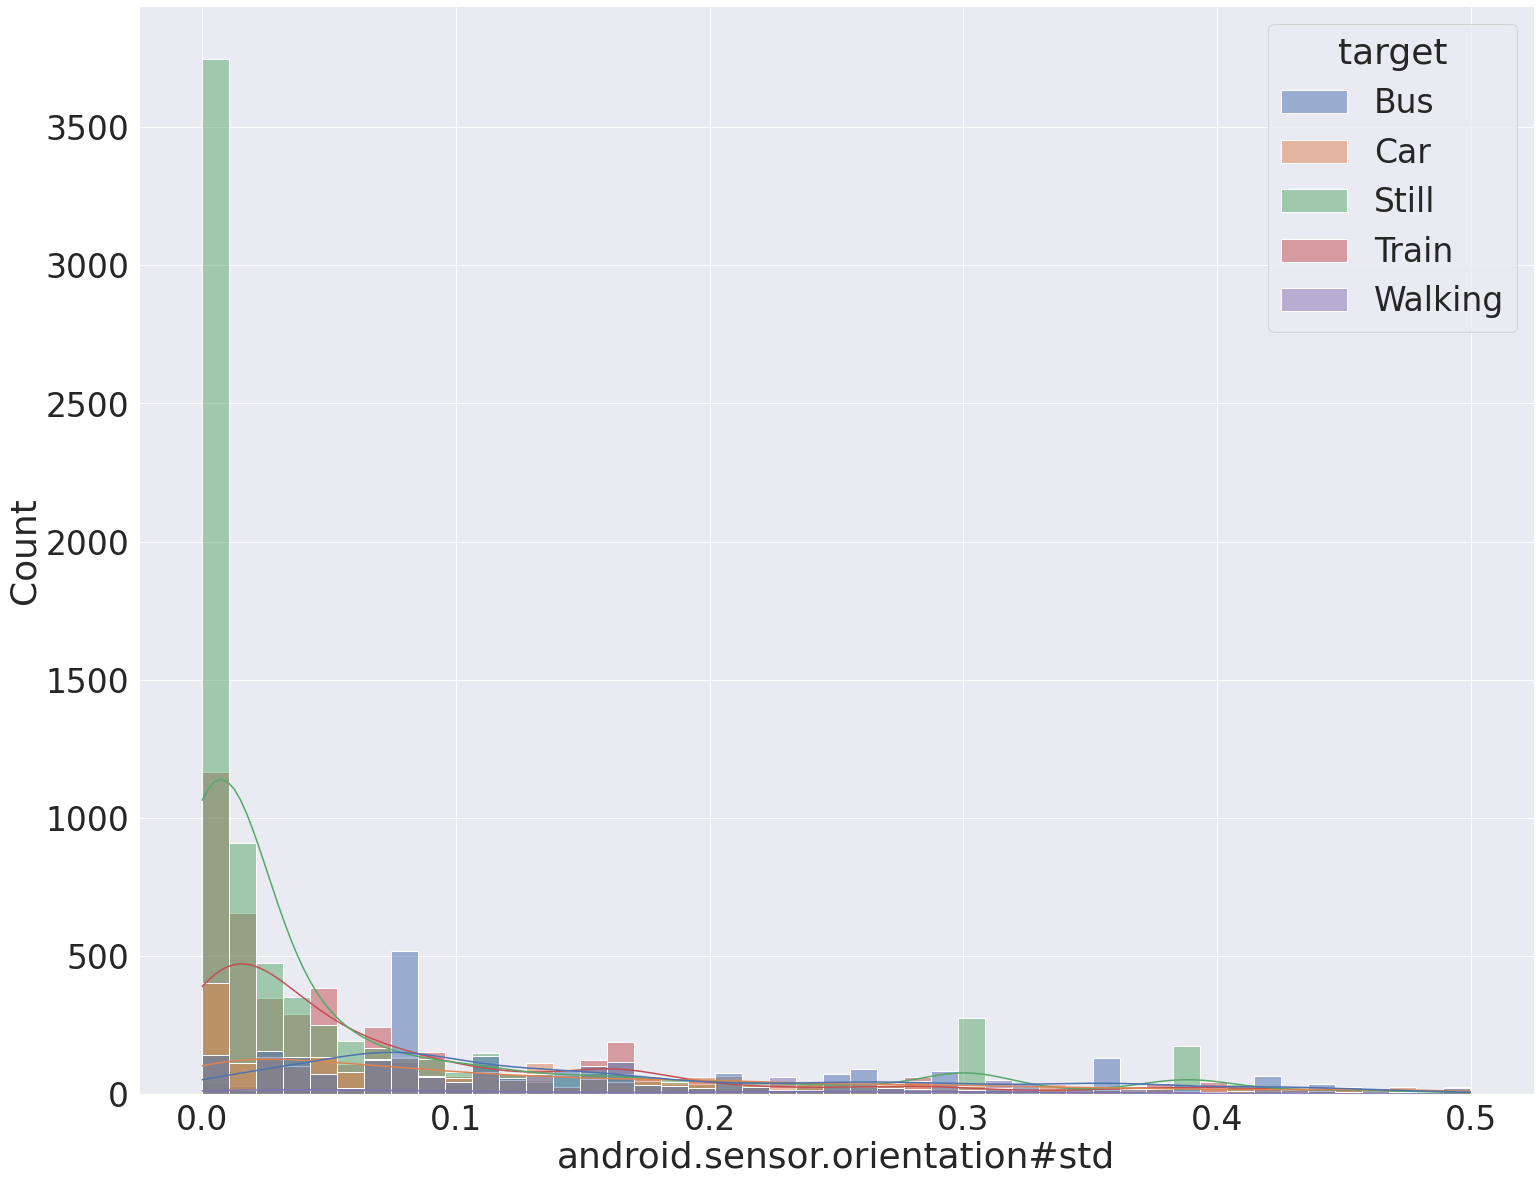

In [47]:
sns.set(font_scale= 3)
plt.figure(figsize=(25, 20))
sns.histplot(x=small_df['android.sensor.orientation#std'], kde=True,color="b",hue=small_df["target"])
#plt.xlim([0,20])
#plt.ylim([0,800])
sns.despine()

In [48]:
small_df.columns

Index(['time', 'android.sensor.accelerometer#mean',
       'android.sensor.accelerometer#min', 'android.sensor.accelerometer#max',
       'android.sensor.accelerometer#std',
       'android.sensor.game_rotation_vector#mean',
       'android.sensor.gyroscope#mean',
       'android.sensor.linear_acceleration#mean',
       'android.sensor.magnetic_field#mean', 'android.sensor.orientation#mean',
       'android.sensor.orientation#std', 'android.sensor.rotation_vector#mean',
       'target', 'user'],
      dtype='object')

In [49]:

num_vars=['android.sensor.accelerometer#mean',
       'android.sensor.accelerometer#min', 'android.sensor.accelerometer#max',
       'android.sensor.accelerometer#std',
       'android.sensor.game_rotation_vector#mean',
       'android.sensor.gyroscope#mean',
       'android.sensor.linear_acceleration#mean',
       'android.sensor.magnetic_field#mean', 'android.sensor.orientation#mean',
       'android.sensor.orientation#std', 'android.sensor.rotation_vector#mean']

In [67]:
train_users = small_df[ppdf['user'] != "U12"]
test_user = small_df[ppdf['user'] == "U12"]

train_users = small_df[(small_df['user'] != "U12") & (small_df['user'] != "U9") & (small_df['user'] != "U2")]
test_user = small_df[(small_df['user'] == "U12") | (small_df['user'] == "U9")| (small_df['user'] == "U2")]


x_train=train_users[num_vars]
y_train=train_users["target"].map({"Bus":1, "Car":1, "Still": 2, "Train":1, "Walking": 3})
x_test=test_user[num_vars]
y_test=test_user["target"].map({"Bus":1, "Car":1, "Still": 2, "Train":1, "Walking": 3})
x_train.head()

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


android.sensor.accelerometer#mean  android.sensor.accelerometer#min  \
1869                          10.194398                          9.977275   
1870                          10.426951                         10.357122   
1872                          10.270841                         10.020837   
1874                          10.300643                         10.182488   
1875                          10.448031                         10.428734   

      android.sensor.accelerometer#max  android.sensor.accelerometer#std  \
1869                         10.319881                          0.188793   
1870                         10.496779                          0.098752   
1872                         10.520844                          0.353559   
1874                         10.401538                          0.110540   
1875                         10.467328                          0.027290   

      android.sensor.game_rotation_vector#mean  android.sensor.gyroscope#mean  \
1869                                  0.730150                       0.281462   
1870                                  0.730150                       0.099249   
1872                                  0.730150                       0.099249   
1874                                  0.730150                       0.108402   
1875                                  0.702223                       0.108402   

      android.sensor.linear_acceleration#mean  \
1869                                 0.668568   
1870                                 0.668568   
1872                                 1.020046   
1874                                 0.727382   
1875                                 0.937174   

      android.sensor.magnetic_field#mean  android.sensor.orientation#mean  \
1869                           42.223867                       203.625705   
1870                           41.672254                       203.625705   
1872                           42.717173                       202.720577   
1874                           43.019135                       201.004211   
1875                           43.372973                       201.004211   

      android.sensor.orientation#std  android.sensor.rotation_vector#mean  
1869                        0.418637                             0.985503  
1870                        0.418637                             0.984948  
1872                        0.418637                             0.986023  
1874                        0.418637                             0.986353  
1875                        0.418637                             0.986353

In [68]:
cat_vars=[]

#### Handling Null Data

### Preprocessing

In [69]:
cat_4_tree_Models = pipeline.Pipeline(steps=[
    ('one hot', preprocessing.OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=45654))])


num_4_tree_Models=pipeline.Pipeline(steps=[
    (("quantile transformer",preprocessing.QuantileTransformer(n_quantiles=100, random_state=0,
    output_distribution='normal')))])



tree_prepro=compose.ColumnTransformer(transformers=[
    ("categorical",cat_4_tree_Models,cat_vars),
    ("numerical",num_4_tree_Models,num_vars)]) 

tree_prepro

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('one hot',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=45654))]),
                                 []),
                                ('numerical',
                                 Pipeline(steps=[('quantile transformer',
                                                  QuantileTransformer(n_quantiles=100,
                                                                      output_distribution='normal',
                                                                      random_state=0))]),
                                 ['android.sensor.accelerometer#mean',
                                  'android.sensor.accelerometer#min',
                                  'android.sensor.accelerometer#max',
                                  'android.sensor.accelerometer#std',
                                  'android.sensor.game_rotation_vector#mean',
                                  'android.sensor.gyroscope#mean',
                                  'android.sensor.linear_acceleration#mean',
                                  'android.sensor.magnetic_field#mean',
                                  'android.sensor.orientation#mean',
                                  'android.sensor.orientation#std',
                                  'android.sensor.rotation_vector#mean'])])

### Machine Learning Tree Model Selection

In [70]:
from sklearn.tree          import DecisionTreeClassifier
from sklearn.ensemble      import RandomForestClassifier
from sklearn.ensemble      import ExtraTreesClassifier
from sklearn.ensemble      import AdaBoostClassifier
from sklearn.ensemble      import GradientBoostingClassifier
from sklearn.experimental  import enable_hist_gradient_boosting # Necesary for HistGradientBoostingClassifier
from sklearn.ensemble      import HistGradientBoostingClassifier
from xgboost               import XGBClassifier
from lightgbm              import LGBMClassifier
from catboost              import CatBoostClassifier

In [73]:
model=XGBClassifier()

model.fit(x_train,y_train)
prep=model.predict(x_test)
metrics.balanced_accuracy_score(y_test,prep)

/root/venv/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[08:42:14] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.4574215267899479

In [ ]:
#####################################################
## TEST TRAIN  SPLIT --> USER 12 TEST. ELSE TRAIN 

In [ ]:
# YOUR CODE HERE
tree_pipelines={
    "Decision Tree": DecisionTreeClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Skl GBM": GradientBoostingClassifier(),
    "Skl HistGBM": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier() 
    }

tree_pipelines = {name: pipeline.make_pipeline(tree_prepro, model) for name, model in tree_pipelines.items()}

tree_pipelines["XGBoost"]

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('one hot',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=45654))]),
                                                  []),
                                                 ('numerical',
                                                  Pipeline(steps=[('quantile '
                                                                   'transformer',
                                                                   QuantileTransformer(n_quantiles=100,
                                                                                       output_distribution='normal',
                                                                                       random_state=0))]),
                                                  ['android.sensor.acceler...
                               importance_type='gain',
                               interaction_constraints=None, learning_rate=None,
                               max_delta_step=None, max_depth=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=None, reg_alpha=None,
                               reg_lambda=None, scale_pos_weight=None,
                               subsample=None, tree_method=None,
                               validate_parameters=None, verbosity=None))])

In [ ]:
y_train.unique()

array([1, 2, 3, 4, 5])

In [ ]:
clf=XGBClassifier().fit(x_train,y_train)
pred2=clf.predict(x_test)
metrics.balanced_accuracy_score(y_test, pred2)*100


/root/venv/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[14:23:26] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


38.43290740017052

In [ ]:

x_train2, x_val, y_train2, y_val = model_selection.train_test_split(x_train,y_train, test_size=0.2,stratify = y_train, random_state=4)




results = pd.DataFrame({'Model': [], 'Accuracy': [], 'Bal Acc.': [], 'Time': []})

for model_name, model in tree_pipelines.items():
    start_time = time.time()
    
    # FOR EVERY PIPELINE (PREPRO + MODEL) -> TRAIN WITH TRAIN DATA (x_train)
    model.fit(x_train2,y_train2)
    # GET PREDICTIONS USING x_val
    pred = model.predict(x_val)

    total_time = time.time() - start_time

    results = results.append({"Model":    model_name,
                              "Accuracy": metrics.accuracy_score(y_val, pred)*100,
                              "Bal Acc.": metrics.balanced_accuracy_score(y_val, pred)*100,
                              "Time":     total_time},
                              ignore_index=True)
                              
                              





results_ord = results.sort_values(by=['Accuracy'], ascending=False, ignore_index=True)
results_ord.index += 1 
results_ord.style.bar(subset=['Accuracy', 'Bal Acc.'], vmin=0, vmax=100, color='#5fba7d')

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:

from sklearn.model_selection import cross_val_predict

skf = model_selection.StratifiedKFold(n_splits=10, random_state=0, shuffle=True)




results = pd.DataFrame({'Model': [], 'Accuracy': [], 'Bal Acc.': [], 'Time': []})





for model_name, model in tree_pipelines.items():
    start_time = time.time()


        
    # TRAIN AND GET PREDICTIONS USING cross_val_predict() and x,y
    pred = cross_val_predict(model, x_train,y_train, cv=skf)

    total_time = time.time() - start_time

    results = results.append({"Model":    model_name,
                              "Accuracy": metrics.accuracy_score(y_train, pred)*100,
                              "Bal Acc.": metrics.balanced_accuracy_score(y_train, pred)*100,
                              "Time":     total_time},
                              ignore_index=True)
                              
                              


results_ord = results.sort_values(by=['Accuracy'], ascending=False, ignore_index=True)
results_ord.index += 1 
results_ord.style.bar(subset=['Accuracy', 'Bal Acc.'], vmin=0, vmax=100, color='#5fba7d')


KeyboardInterrupt: 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=dd66c499-8cd9-44d2-87d5-ecc9c3ddd387' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>